
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


Зчитую дані з файлу у датафрейм


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/clean_data2.csv"
df = pd.read_csv(path)
df.head()


Mounted at /content/drive


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


Буду використовувати тільки числові дані


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = df._get_numeric_data()
df.head()

,GDP per capita,Population,CO2 emission,Area,Population density
0,561.778746,34656032.0,9809.225000,652860,53.083405
1,4124.982390,2876101.0,5716.853000,28750,100.038296
2,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,11834.745230,55599.0,165114.116337,200,277.995000
4,36988.622030,77281.0,462.042000,470,164.427660


Записую дані у два датафрейми: предиктори (x_data) та відгуки (y_data).


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
y_data = df['CO2 emission']
x_data=df.drop('CO2 emission',axis=1)


Випадковим чином розділяю дані на навчальні та тестові (40% загального набору в якості тестових даних).


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 44
number of training samples: 173


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


<p>З попередніх робіт знаю, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population
</li>
    <li>Area</li>
</ul>
При цьому одномірна модель для ознаки 1 була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

<p>Створюю об’єкт лінійної регресії та навчаю модель</p>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

Підбираю модель за ознакою 'Population':

In [ ]:
lre.fit(x_train[['Population']], y_train)

LinearRegression()

Обчислюю R^2  на навчальних та тестових даних:


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lre.score(x_train[['Population']], y_train)


0.6476003431375894

In [ ]:
lre.score(x_test[['Population']], y_test)

0.5154367821954019

<p>Вони різні бо відбулось перенавчання. Модель може бути занадто складною для ефективного узагальнення нових даних, що призводить до зниження її прогностичної ефективності на тестових даних. </p>
<p>При виборі моделі треба орієнтуватись на її здатності точно прогнозувати нові дані. Тому аналіз результатів на тестових даних є важливим, оскільки вони найкраще відображають реальну продуктивність моделі.</p>


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


Будую поліноміальну модель 2 ступеня, на тестових даних обчислюю R^2


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.preprocessing import PolynomialFeatures
# Виконую поліноміальне перетворення 2 ступеня для ознаки 'Population'
pr=PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['Population']])
x_test_pr = pr.fit_transform(x_test[['Population']])
pr
# Будую поліноміальну модель
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

# На тестових даних обчислюю R^2
poly.score(x_test_pr, y_test)


0.5211384290446694

In [ ]:
# На навчальних даних обчислюю R^2
poly.score(x_train_pr, y_train)

0.6476834072195111

Будую поліноміальну модель 3 ступеня, на тестових даних обчислюю R^2


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# Виконую поліноміальне перетворення 3 ступеня для ознаки 'Population'
pr=PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['Population']])
x_test_pr = pr.fit_transform(x_test[['Population']])
pr
# Будую поліноміальну модель
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

# На тестових даних обчислюю R^2
poly.score(x_test_pr, y_test)


0.2305727851095173

In [ ]:
# На навчальних даних обчислюю R^2
poly.score(x_train_pr, y_train)

0.6122570744343556

Будую поліноміальну модель 4 ступеня, на тестових даних обчислюю R^2


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# Виконую поліноміальне перетворення 4 ступеня для ознаки 'Population'
pr=PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['Population']])
x_test_pr = pr.fit_transform(x_test[['Population']])
pr
# Будую поліноміальну модель
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
# На тестових даних обчислюю R^2
poly.score(x_test_pr, y_test)


-0.12332512457570788

In [ ]:
# На навчальних даних обчислюю R^2
poly.score(x_train_pr, y_train)

0.657629623256354

Найкращою є модель 2 ступеня, бо для 3 ступеня вже спостерігається перенавчання.


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


Будую модель гребеневої регресії, обчислюю R^2


In [ ]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['Population', 'Area']])
x_test_pr=pr.fit_transform(x_test[['Population', 'Area']])


In [ ]:
# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=10)


Подібно до звичайної регресії будую модель за допомогою методу fit

In [ ]:
RigeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50471e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

прогноз

In [ ]:
yhat = RigeModel.predict(x_test_pr)


Порівнюю перші п’ять прогнозованих значень із нашим тестовим набором:

In [ ]:
print('predicted:', yhat[0:5])
print('test set :', y_test[0:5].values)


predicted: [ 38109.89574678  58785.73263257  61306.48958831  37133.37312833
 274493.97246648]
test set : [ 165114.11633659    6684.941         7003.97         19519.441
 1214048.358     ]


In [ ]:
test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)


На тестових даних обчислюю R^2

In [ ]:
print(RigeModel.score(x_test_pr, y_test))


-1.8141470300328568


На навчальних даних обчислюю R^2

In [ ]:
print(RigeModel.score(x_train_pr, y_train))

0.9475114634042926


Бачимо, що R^2 для навчальних даних становить 0.9475, тоді як R^2 для тестових даних становив -1.814. Чим менше R^2, тим гірша модель. Від’ємний R^2 є ознакою перенавчання.

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


Створюю словник значень параметрів:


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1


[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
RR=Ridge()
RR
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Підбираю модель:


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
Grid1.fit(x_data[['Population', 'Area']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

Отримую модель з найкращими параметрами:


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000000)

Тестую модель на тестових даних (обчислюю R^2):


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
BestRR.score(x_test[['Population', 'Area']], y_test)

0.3506943821125924

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих)</p>
</div>


Використаю метод "predict", щоб спрогнозувати результати, а потім скористаюсь функцією "DistributionPlot", щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.


<ipython-input-35-b59b30037091>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-35-b59b30037091>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName

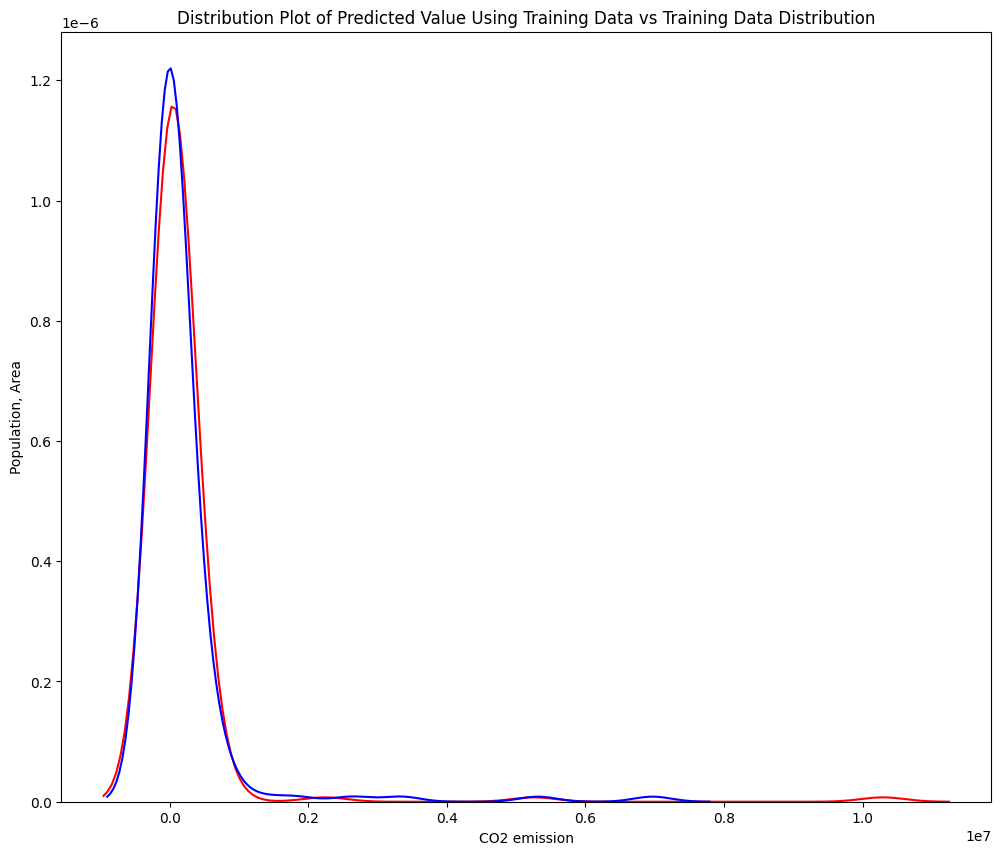

In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
 width = 12
 height = 10
 plt.figure(figsize=(width, height))
 ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
 ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
 plt.title(Title)
 plt.xlabel('CO2 emission')
 plt.ylabel('Population, Area')
 plt.show()
 plt.close()

# Створюю кілька об’єктів лінійної регресії та навчаю моделі, використовуючи 'Population', 'Area' як ознаки-предиктори.
lr = LinearRegression()
lr.fit(x_train[['Population', 'Area']], y_train)
yhat_train = lr.predict(x_train[['Population', 'Area']])
yhat_test = lr.predict(x_test[['Population', 'Area']])

Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)


Рисунок 1: Діаграма прогнозованих значень на основі навчальних даних порівняно з фактичними значеннями навчальних даних.

Поки що модель, здається, добре навчається з навчального набору даних. Але що відбувається, коли модель зустрічає нові дані з тестового набору даних? Коли модель генерує нові значення з тестових даних, бачимо, що розподіл прогнозованих значень сильно відрізняється від фактичних цільових значень.

<ipython-input-35-b59b30037091>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-35-b59b30037091>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName

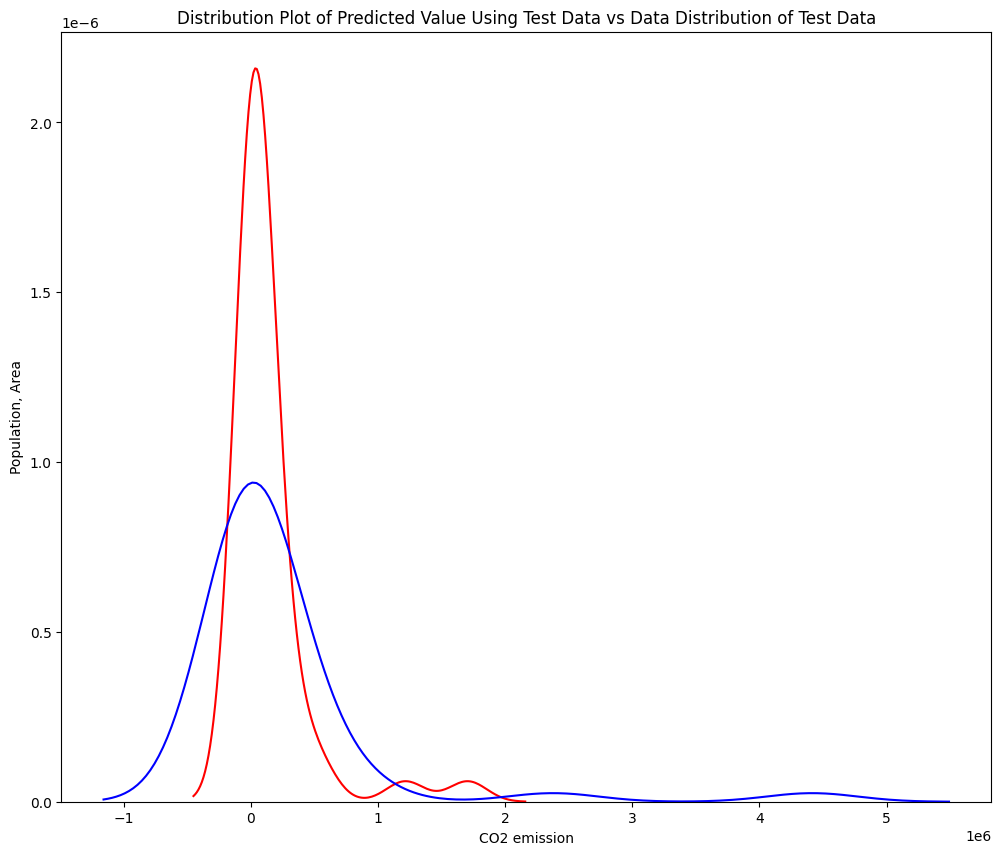

In [ ]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)


Рисунок 2: Діаграма прогнозованих значень на основі тестових даних порівняно з фактичними значеннями тестових даних.

При порівнянні рисунків стає очевидним, що розподіл тестових даних на рис.1 набагато краще відповідає даним. Тут форма розподілу дуже відрізняється.

<h2>Виконала студентка групи ІП-21 <br> Скрипець Ольга</h2>
